In [6]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [7]:
players = pd.read_csv('Players.csv')


In [8]:
players.head(10)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


In [10]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
Unnamed: 0     3922 non-null int64
Player         3921 non-null object
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_city     3452 non-null object
birth_state    3439 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [11]:
players = players.dropna()
print(players.shape)

(3189, 8)


In [12]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3919
Data columns (total 8 columns):
Unnamed: 0     3189 non-null int64
Player         3189 non-null object
height         3189 non-null float64
weight         3189 non-null float64
collage        3189 non-null object
born           3189 non-null float64
birth_city     3189 non-null object
birth_state    3189 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 224.2+ KB


In [13]:
players.columns

Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')

In [14]:
del players['Unnamed: 0']

In [15]:
players['height'] = players.height.astype('int64')
players['weight'] = players.weight.astype('int64')
players['born'] = players.born.astype('int64')

In [16]:
players.head(10)

,Player,height,weight,collage,born,birth_city,birth_state
1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana
4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky
6,Charlie Black,196,90,University of Kansas,1921,Arco,Idaho
7,Nelson Bobb,183,77,Temple University,1924,Philadelphia,Pennsylvania
8,Jake Bornheimer,196,90,Muhlenberg College,1927,New Brunswick,New Jersey
9,Vince Boryla,196,95,University of Denver,1927,East Chicago,Indiana
10,Don Boven,193,95,Western Michigan University,1925,Kalamazoo,Michigan
11,Harry Boykoff,208,102,St. John's University,1922,Brooklyn,New York
12,Joe Bradley,190,79,Oklahoma State University,1928,Washington,Oklahoma
14,Carl Braun,196,81,Colgate University,1927,Brooklyn,New York


In [17]:
top_colleges_df = players.groupby('collage')[['Player']].count().sort_values('Player', ascending=False).head(10)
top_colleges_df.style.bar(color = 'Salmon')

,Player
collage,
University of Kentucky,84
"University of California, Los Angeles",84
University of North Carolina,65
University of Kansas,58
Duke University,54
University of Notre Dame,43
St. John's University,43
Michigan State University,43
Syracuse University,43


### Heihgt, weight, born

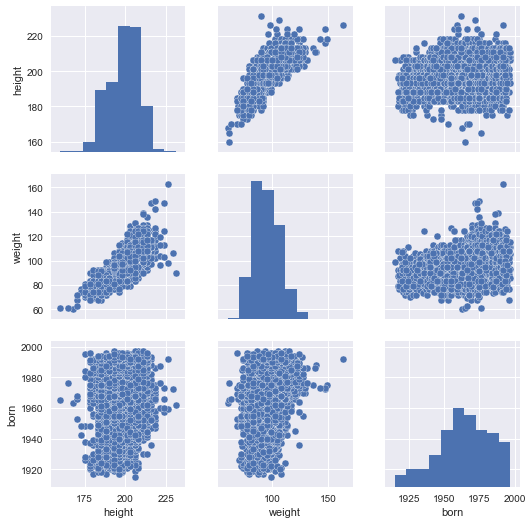

In [18]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    players[['height', 'weight', 'born']]);
sns_plot.savefig('pairplot.png')

### NBA players states of birth

In [19]:
states_df = players.groupby('birth_state')[['Player']].count().sort_values('Player', ascending=False)
states_df.head(10)

,Player
birth_state,
California,337
New York,286
Illinois,203
Pennsylvania,162
Ohio,136
Michigan,131
Texas,127
Georgia,113
Louisiana,101


In [20]:
df = states_df.reset_index()
df

,birth_state,Player
0,California,337
1,New York,286
2,Illinois,203
3,Pennsylvania,162
4,Ohio,136
5,Michigan,131
6,Texas,127
7,Georgia,113
8,Louisiana,101
9,North Carolina,96


In [21]:
df_new = df.rename(columns={'birth_state': 'State', 'Player': 'Players'},)

In [22]:
df_new = df_new[['Players', 'State']]

In [23]:
# загружаем файл, содержащий коды штатов, чтобы передать графику геоданые (https://github.com/jasonong/List-of-US-States)
states_codes = pd.read_csv('states.csv')

In [24]:
states_codes.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [25]:
# добавляем колонку с коом штата путем слияния двух датафреймов
stateswithcodes = pd.merge(df_new, states_codes, on='State', how='outer').dropna()
stateswithcodes.reset_index(inplace=True)
del stateswithcodes['index']
stateswithcodes.head()

,Players,State,Abbreviation
0,337.0,California,CA
1,286.0,New York,NY
2,203.0,Illinois,IL
3,162.0,Pennsylvania,PA
4,136.0,Ohio,OH


In [26]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [27]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
stateswithcodes['text'] = stateswithcodes['State'] + '<br>'
    

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = stateswithcodes['Abbreviation'],
        z = stateswithcodes['Players'].astype(int),
        locationmode = 'USA-states',
        text = stateswithcodes['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of players")
        ) ]

layout = dict(
        title = 'NBA players states of birth',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot(fig)
#py.iplot( fig, filename='d3-cloropleth-map' )

In [28]:
seasons = pd.read_csv('Seasons_Stats.csv')
print(seasons.shape)

(24691, 53)


In [29]:
seasons.head(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [30]:
del seasons['Unnamed: 0']

In [31]:
del seasons['blank2']

In [32]:
del seasons['blanl']

In [33]:
seasons_from1980 = seasons.dropna()

In [34]:
seasons_from1980 = seasons_from1980[seasons_from1980['Player'] !=0]
seasons_from1980.reset_index(inplace=True)

In [35]:
seasons_from1980['Year'] = seasons_from1980.Year.astype('int64')

In [36]:
seasons_from2010 = seasons_from1980[(seasons_from1980.Year >= 2010)]

In [37]:
seasons_stat = seasons_from2010.pivot_table(
                        index='Tm', 
                        columns='Year', 
                        values='eFG%', 
                        aggfunc=mean).dropna().applymap(float)
                                                                    

seasons_stat

Year,2010,2011,2012,2013,2014,2015,2016,2017
Tm,,,,,,,,
ATL,0.485250,0.484533,0.503083,0.501941,0.497500,0.504500,0.504200,0.446632
BOS,0.508938,0.476875,0.481400,0.489286,0.478438,0.466368,0.467385,0.539667
CHI,0.427923,0.479727,0.480917,0.443000,0.467000,0.486818,0.480563,0.477875
CLE,0.478312,0.466313,0.440467,0.444667,0.452625,0.475571,0.508571,0.522556
DAL,0.493176,0.508938,0.470923,0.477053,0.496571,0.466667,0.509333,0.472818
DEN,0.497000,0.517143,0.490455,0.502154,0.486286,0.464167,0.482187,0.514500
DET,0.477308,0.494417,0.444846,0.494357,0.469933,0.465800,0.490500,0.451154
GSW,0.511941,0.483250,0.497333,0.493500,0.464231,0.498455,0.548500,0.541733
HOU,0.434250,0.485437,0.452250,0.516412,0.493923,0.482158,0.508687,0.501188


### Effective Field Goal Percentage per Team (2010-2017)

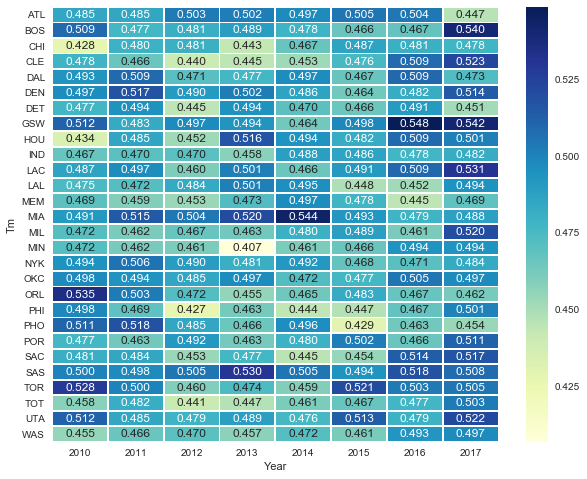

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(seasons_stat, annot=True, fmt=".3f", cmap="YlGnBu",
            linewidths=.9,);


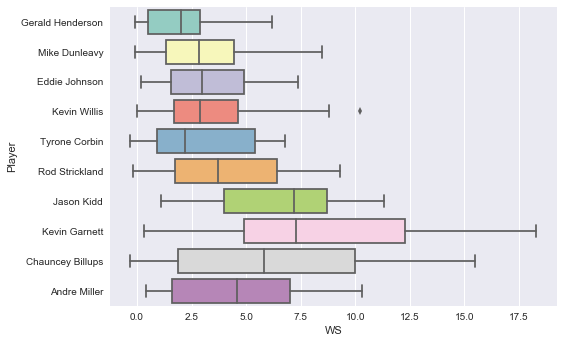

In [89]:
players_ws = seasons_from1980.Player.value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(x="WS", y="Player", data=seasons_from1980[seasons_from1980.Player.isin(players_ws)], palette='Set3', orient = 'h', saturation=0.8)

In [114]:
greatest_players_df = seasons_from1980.groupby('Player')[['G']].sum().sort_values('G', ascending=False)

In [115]:
greatest_players = greatest_players_df.reset_index()

In [116]:
greatest_players_1 = greatest_players[['G', 'Player']]

In [117]:
greatest_players_1

,G,Player
0,1764.0,Eddie Johnson
1,1639.0,Kevin Willis
2,1628.0,Gerald Henderson
3,1562.0,Andre Miller
4,1526.0,Jason Kidd
5,1509.0,Kevin Garnett
6,1504.0,John Stockton*
7,1497.0,Vince Carter
8,1476.0,Karl Malone*
9,1461.0,Mark Jackson


In [118]:
greatest_players_ws= seasons_from1980.groupby('Player')[['WS']].mean().sort_values('WS', ascending=False)

In [119]:
gp_ws = greatest_players_ws.reset_index()


In [120]:
greatest_players_2 = pd.merge(greatest_players_1, gp_ws, on='Player', how='outer').dropna()

In [121]:
gp2 = greatest_players_2.sort_values('WS', ascending=False).iloc[0:10].reset_index()  


In [122]:
del gp2['index']

In [123]:
gp2

,G,Player,WS
0,839.0,David Robinson*,14.727273
1,1061.0,LeBron James,14.685714
2,1072.0,Michael Jordan*,14.260000
3,834.0,Chris Paul,12.891667
4,792.0,Magic Johnson*,12.618182
5,1476.0,Karl Malone*,12.347368
6,891.0,Larry Bird*,12.116667
7,703.0,Kevin Durant,11.990000
8,163.0,Rudy Gobert,11.800000
9,615.0,James Harden,11.400000


### Number of games for players with top WS

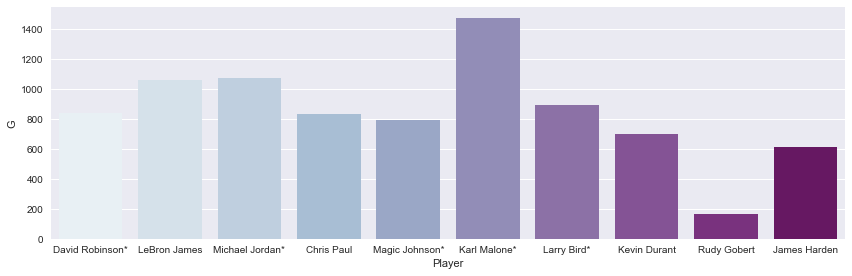

In [130]:
g = sns.factorplot(x="Player", y="G", data=gp2, kind='bar',
                   palette="BuPu", size=4, aspect=3)
g.set_xticklabels(step=1)

In [129]:
sns.factorplot?

### Mean OWS/DWS for TOP10 players

In [50]:
ws = pd.DataFrame()
ws['player'] = seasons_from1980.groupby('Player').mean()['WS'].index
ws['OWS'] = seasons_from1980.groupby('Player').mean()['OWS'].values
ws['DWS'] = seasons_from1980.groupby('Player').mean()['DWS'].values
ws = ws.sort_values('OWS', ascending = False).iloc[0:10].reset_index()

In [51]:
del ws['index']
ws

,player,OWS,DWS
0,LeBron James,10.271429,4.400000
1,Michael Jordan*,9.993333,4.280000
2,Chris Paul,9.566667,3.325000
3,Magic Johnson*,9.154545,3.500000
4,James Harden,8.600000,2.812500
5,Kevin Durant,8.500000,3.480000
6,David Robinson*,8.227273,6.472727
7,Reggie Miller*,7.800000,1.888889
8,Stephen Curry,7.725000,2.775000
9,Charles Barkley*,7.712500,3.375000


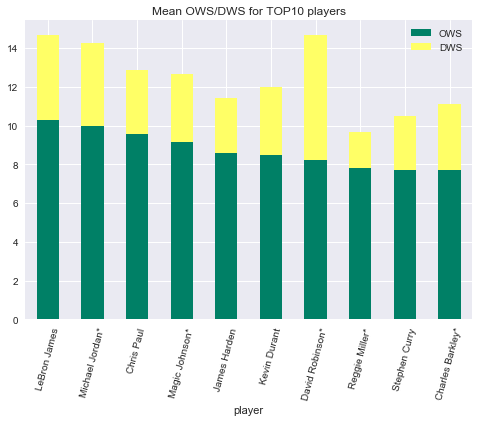

In [52]:
ws.plot(kind='bar', x=ws['player'], title = 'Mean OWS/DWS for TOP10 players', colormap = 'summer', use_index=True, rot=75, sort_columns = True, stacked=True);